### IMPORTS

In [260]:
import pandas as pd
import os
import numpy as numpy

import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import plotly as px

# First Deep Learning Project in Python with Keras

The steps we are going to cover:
1. Load Data.
2. Define Keras Model.
3. Compile Keras Model.
4. Fit Keras Model.
5. Evaluate Keras Model.
6. Put It All Together.
7. Make Predictions

## Load Data
    

Download the dataset and place it in your local working directory, the same location as your python file. Take a look at the dataset:

In [261]:
df = pd.read_csv('../data/housepricedata.csv')

In [262]:
df.head(10)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


Here, you can explore the data a little. We have our input features in the first ten columns:

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:
- Is the house price above the median or not? (1 for yes and 0 for no)

Which task are we going to train the neural network for (regression, classification, other...) ?

In [263]:
# Your answer here : CLASSIFICATION

Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [264]:
dataset = df.values

In [265]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

Split the dataset into input features (X) and the feature we wish to predict (Y). To do that split, assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y

In [266]:
X = dataset[:,0:10]
y = dataset[:,10]

In [268]:
y

array([1, 1, 1, ..., 1, 0, 0])

Now, we want to split our dataset into a training set, a validation set and a test set. These are the dimensions you need to get for your train, validation and test datasets: (1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [275]:
# splitting into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [276]:
# splitting into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [277]:
print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(1022, 10)
(1022,)
(219, 10)
(219,)
(219, 10)
(219,)


(None, None)

Feature scaling will help us see all the variables from the same scale, it will also help our models learn faster

In [279]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


## Define Keras Model.

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:
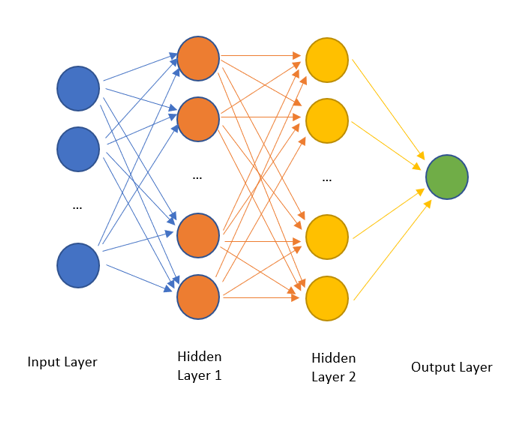
In words, we want to have these layers:

- Hidden layer 1: 12 neurons, ReLU activation
- Hidden layer 2: 16 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

In [280]:
# Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# define model
model=Sequential()

model.add(Dense(12, input_dim=10, activation='relu')) # Hidden layer 1: 12 neurons, ReLU activation
model.add(Dense(16, activation='relu')) #Hidden layer 2: 16 neurons, ReLU activation
model.add(Dense(1, activation='sigmoid')) # oOutput Layer: 1 neuron, Sigmoid activation (binary classification)

Now that the model is defined, we can compile it.

Compiling the model uses TensorFlow that chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

In [281]:
# compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data (use 100 iterations and 32 batch size).

In [282]:
# train model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


32/32 [==============================] - 1s 4ms/step - loss: 0.2433 - accuracy: 0.5313
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2316 - accuracy: 0.5900
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2213 - accuracy: 0.6497
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2120 - accuracy: 0.6996
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2036 - accuracy: 0.7348
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1959 - accuracy: 0.7701
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1887 - accuracy: 0.7867
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1819 - accuracy: 0.8033
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1755 - accuracy: 0.8121
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1694 - accuracy: 0.8190
Epoch 11/100
32/32 [=

In [283]:
pred = model.predict(X_val)
rnd_pred = [round(pred[0]) for pred in pred]

7/7 [==============================] - 0s 2ms/step


In [284]:
# calculate accuracy on validation set
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, rnd_pred)
print(f'Accuracy =: {accuracy * 100:.2f}%')

Accuracy =: 91.78%


We have trained our model, which gives us a correct accuracy. But we haven't used our validation set properly, and our test set at all. Let's correct that.

In [285]:
# train model

predictions_val = model.predict(X_val)
rounded_predictions_val = [round(pred[0]) for pred in predictions_val]

accuracy_val = accuracy_score(y_val, rounded_predictions_val)
print(f'Accuracy on the validation set: {accuracy_val * 100:.2f}%')


7/7 [==============================] - 0s 3ms/step
Accuracy on the validation set: 91.78%


In [286]:
# predict on TEST set
predictions_test = model.predict(X_test)
rounded_predictions_test = [round(pred[0]) for pred in predictions_test]


# calculate accuracy on test set

accuracy_test = accuracy_score(y_test, rounded_predictions_test)
print(f'Accuracy on the test set: {accuracy_test * 100:.2f}%')

7/7 [==============================] - 0s 2ms/step
Accuracy on the test set: 89.95%


Visualize training and validation losses and accuracies plots with the help of keras

In [287]:
# visualize training and validation accuracies

import matplotlib.pyplot as plt


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
 1/32 [..............................] - ETA: 0s - loss: 0.0129 - accuracy: 1.0000

32/32 [==============================] - 0s 12ms/step - loss: 0.0782 - accuracy: 0.8885 - val_loss: 0.0644 - val_accuracy: 0.9178
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0781 - accuracy: 0.8885 - val_loss: 0.0643 - val_accuracy: 0.9178
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0780 - accuracy: 0.8885 - val_loss: 0.0642 - val_accuracy: 0.9178
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0779 - accuracy: 0.8885 - val_loss: 0.0641 - val_accuracy: 0.9178
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0778 - accuracy: 0.8885 - val_loss: 0.0641 - val_accuracy: 0.9178
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0776 - accuracy: 0.8885 - val_loss: 0.0640 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0775 - accuracy: 0.8885 - val_loss: 0.0639 - val_accuracy: 0.9178
Epoch 8/100
32/32 [=====

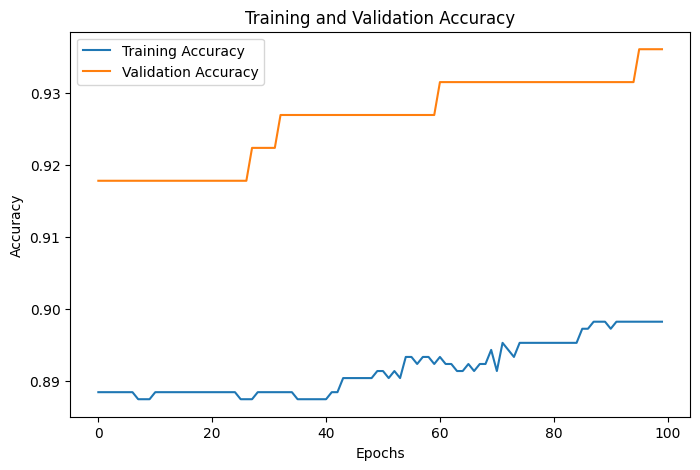

In [288]:

plt.figure(figsize=(8, 5))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


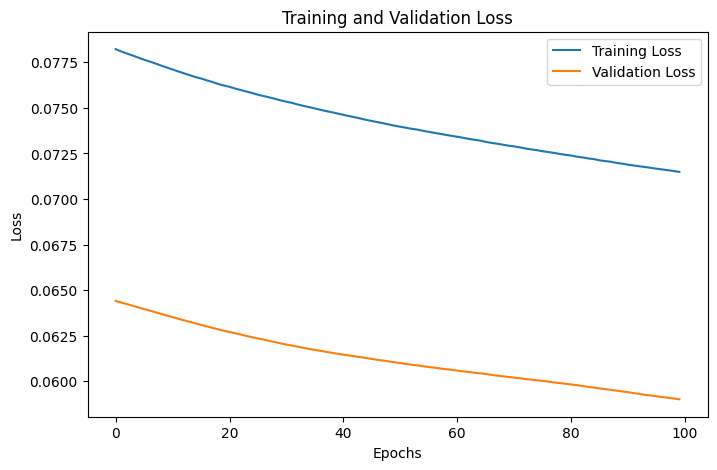

In [289]:
# visualize training and validation losses
plt.figure(figsize=(8, 5))


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. A list of most hyperparameters available keras: 

https://keras.io/api/layers/initializers/

https://keras.io/api/layers/activations/

https://keras.io/api/losses/

https://keras.io/api/optimizers/

In [290]:
from tensorflow.keras import layers
from tensorflow.keras import initializers

model=Sequential()


batch_size = 32
epochs = 100

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

model.add(Dense(units=16,
                #kernel_initializer='random_normal',
                #bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
                #input_dim=10,
                activation='relu'
       )) # Hidden layer 1: 12 neurons, ReLU activation

model.add(Dense(units=64,
                activation='relu'
              
       )) #Hidden layer 2: 16 neurons, ReLU activation

model.add(Dense(units=1, 
                activation='sigmoid'
       )) # oOutput Layer: 1 neuron, Sigmoid activation (binary classification)

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 0.2590 - accuracy: 0.4902 - val_loss: 0.2551 - val_accuracy: 0.5297
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2379 - accuracy: 0.5812 - val_loss: 0.2330 - val_accuracy: 0.6256
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2202 - accuracy: 0.6673 - val_loss: 0.2143 - val_accuracy: 0.6758
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2054 - accuracy: 0.7270 - val_loss: 0.1983 - val_accuracy: 0.7352
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1927 - accuracy: 0.7573 - val_loss: 0.1846 - val_accuracy: 0.7717
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1816 - accuracy: 0.7906 - val_loss: 0.1727 - val_accuracy: 0.8128
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1720 - accuracy: 0.8200 - val_loss: 0.1624 - val_accuracy: 0.8493
Epoch 8/100


In [228]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [229]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 16)                176       
                                                                 
 dense_72 (Dense)            (None, 64)                1088      
                                                                 
 dense_73 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1329 (5.19 KB)
Trainable params: 1329 (5.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [291]:
predictions_test = model.predict(X_test)
rounded_predictions_test = [round(pred[0]) for pred in predictions_test]
accuracy_test = accuracy_score(y_test, rounded_predictions_test)

predictions_val = model.predict(X_val)
rounded_predictions_val = [round(pred[0]) for pred in predictions_val]
accuracy_val = accuracy_score(y_val, rounded_predictions_val)


print(f'Accuracy on the test set: {accuracy_test * 100:.2f}%')
print(f'Accuracy on the validation set: {accuracy_val * 100:.2f}%')

7/7 [==============================] - 0s 3ms/step
Accuracy on the test set: 90.41%
Accuracy on the validation set: 91.78%


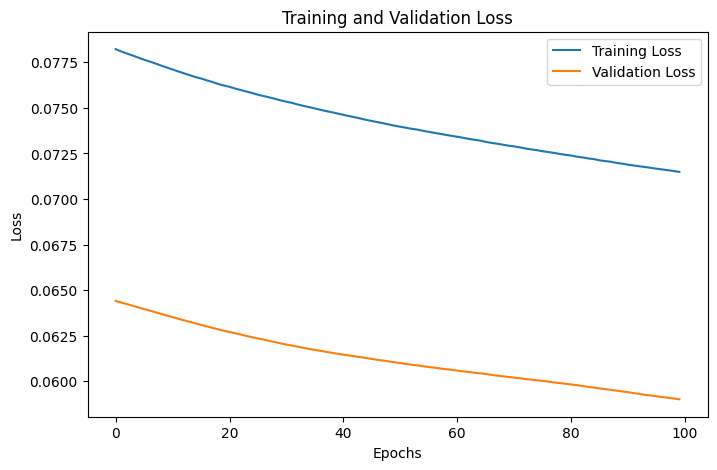

In [292]:
plt.figure(figsize=(8, 5))


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

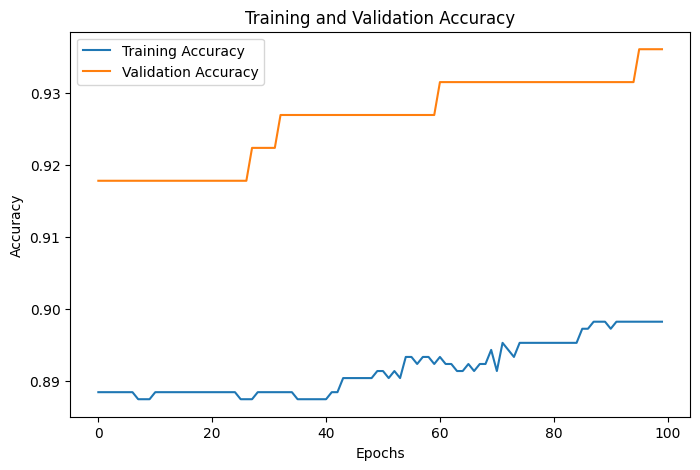

In [293]:

plt.figure(figsize=(8, 5))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [233]:
X_val

array([[-0.31308477, -0.82305655,  1.29315563, ..., -0.33448024,
        -0.9432625 , -0.96534081],
       [-0.38629076,  0.63603069, -0.50862358, ..., -0.33448024,
         0.59424033,  0.03302105],
       [-0.01796482,  0.63603069, -0.50862358, ...,  1.50666236,
         0.59424033,  2.42812955],
       ...,
       [-0.32915653, -0.82305655, -0.50862358, ...,  0.89294816,
        -0.9432625 , -0.37016355],
       [-0.17453204,  2.09511793, -0.50862358, ...,  0.27923396,
         0.59424033,  2.75931689],
       [ 0.07890729,  0.63603069, -0.50862358, ..., -0.33448024,
        -0.9432625 ,  0.01382178]])